In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Cálculo RR Brasil

In [ ]:
# Base SIM_DOFET
df_sim = pd.read_csv('./base_limpa/base_sim_dofet_limpa_remocao.csv')
# Base SINASC
df_sinasc = pd.read_csv('./base_limpa/base_sinasc_limpa_remocao.csv')

In [ ]:
#df_obito=df_sim
#df_nasc=df_sinasc
#region=None
#semana=22
#
## Filtrar nascimentos e óbitos a partir da semana gestacional especificada
#df_nasc_exposto = df_nasc[df_nasc['SEMAGESTAC'] >= semana].reset_index(drop=True)
#df_obito_exposto = df_obito[df_obito['SEMAGESTAC'] >= semana].reset_index(drop=True)
#
## Filtrar óbitos apenas da semana específica para o cálculo do RR
#df_obito_semana = df_obito[df_obito['SEMAGESTAC'] == semana]
#df_nasc_semana = df_nasc[df_nasc['SEMAGESTAC'] == semana]
#
#if region:
#    df_nasc_exposto = df_nasc_exposto[df_nasc_exposto['nasc_REGIAO'] == region].reset_index(drop=True)
#    df_nasc_semana = df_nasc_semana[df_nasc_semana['nasc_REGIAO'] == region].reset_index(drop=True)
#    df_obito_exposto = df_obito_exposto[df_obito_exposto['ocor_REGIAO'] == region].reset_index(drop=True)
#    df_obito_semana = df_obito_semana[df_obito_semana['ocor_REGIAO'] == region].reset_index(drop=True)
#
## Contagem de óbitos da semana e nascimentos acumulados desde a semana
#deaths_exposto = df_obito_exposto.groupby('cat_peso_calc').size()  # Contagem de óbitos por grupo exposto >= semana
#deaths_semana = df_obito_semana.groupby('cat_peso_calc').size()  # Contagem de óbitos por grupo na semana
#births_exposto = df_nasc_exposto.groupby('cat_peso_calc').size()  # Contagem de nascimentos por grupo exposto >= semana
#births_semana = df_nasc_semana.groupby('cat_peso_calc').size()   # Contagem de nascimentos por grupo na semana
#
## Estatísticas gerais
#fetos_em_risco = len(df_nasc_exposto) + len(df_obito_exposto)  # Todos os fetos a partir da semana
#nascimetos_sem = len(df_nasc_semana)  # Nascimentos da semana
#obitos_sem = len(df_obito_semana)  # Óbitos da semana
#total_nascimentos = nascimetos_sem + obitos_sem
#
## Prevalencias
#prev_AIG = (births_semana['AIG'] + deaths_semana['AIG'])/total_nascimentos
#prev_aig_ic = calcular_prevalencia_com_ic(n_total=total_nascimentos, prevalencia=prev_AIG, nivel_confianca=0.95)
#prev_PIG = (births_semana['PIG'] + deaths_semana['PIG'])/total_nascimentos
#prev_pig_ic = calcular_prevalencia_com_ic(n_total=total_nascimentos, prevalencia=prev_PIG, nivel_confianca=0.95)
#prev_GIG =(births_semana['GIG'] + deaths_semana['GIG'])/total_nascimentos
#prev_gig_ic = calcular_prevalencia_com_ic(n_total=total_nascimentos, prevalencia=prev_GIG, nivel_confianca=0.95)
#
## Inicializar o dicionário de resultados
#rr_results = {
#    'Gestational Week': semana,
#    'Fetuses at Risk': fetos_em_risco,
#    'Total Births': total_nascimentos,
#    'Live Births': nascimetos_sem,
#    'Stillbirths': obitos_sem
#}
#
## Comparações
#comparisons = [
#    ('AIG', 'PIG'),
#    ('AIG', 'GIG'),
#    ('GIG', 'PIG')
#]
#
#for ref, exp in comparisons:
#    if ref in deaths_semana and exp in deaths_semana and ref in births_exposto and exp in births_exposto:
#        rate_exp = deaths_semana[exp] / (births_exposto[exp] + deaths_exposto[exp])
#        rate_ref = deaths_semana[ref] / (births_exposto[ref] + deaths_exposto[ref])
#        rr = rate_exp / rate_ref
#        
#        # Calcular o intervalo de confiança (IC 95%)
#        ci_lower = rr * np.exp(-1.96 * np.sqrt((1/deaths_semana[exp]) + (1/deaths_semana[ref])))
#        ci_upper = rr * np.exp(1.96 * np.sqrt((1/deaths_semana[exp]) + (1/deaths_semana[ref])))
#        
#        # Adicionar o resultado ao dicionário
#        rr_results[f'{exp}_vs_{ref}'] = f'{round(rr, 2)} ({round(ci_lower, 2)}–{round(ci_upper, 2)})'
#    else:
#        # Se não houver dados suficientes para a comparação, retornar NaN
#        rr_results[f'{exp}_vs_{ref}'] = 'NaN'
#    
#rr_results['Prevalencia PIG IC 95%'] = prev_pig_ic
#rr_results['Prevalencia AIG IC 95%'] = prev_aig_ic
#rr_results['Prevalencia GIG IC 95%'] = prev_gig_ic

In [ ]:
def calcular_prevalencia_com_ic(n_total, prevalencia, nivel_confianca=0.95):
     # Calcula o erro padrão
    erro_padrao = np.sqrt((prevalencia * (1 - prevalencia)) / n_total)
    
    # Calcula o valor crítico Z para o nível de confiança
    z = norm.ppf(1 - (1 - nivel_confianca) / 2)
    
    # Calcula os limites do intervalo de confiança
    ic_inferior = prevalencia - z * erro_padrao
    ic_superior = prevalencia + z * erro_padrao
    
    return f'{round(prevalencia*100, 2)} ({round(ic_inferior*100, 2)}-{round(ic_superior*100, 2)})'

In [ ]:
def calculate_rr_e_prevalencia(df_obito, df_nasc, region=None, semana=22):
    # Filtrar nascimentos e óbitos a partir da semana gestacional especificada
    df_nasc_exposto = df_nasc[df_nasc['SEMAGESTAC'] >= semana].reset_index(drop=True)
    df_obito_exposto = df_obito[df_obito['SEMAGESTAC'] >= semana].reset_index(drop=True)
    
    # Filtrar óbitos apenas da semana específica para o cálculo do RR
    df_obito_semana = df_obito[df_obito['SEMAGESTAC'] == semana]
    df_nasc_semana = df_nasc[df_nasc['SEMAGESTAC'] == semana]
    
    if region:
        df_nasc_exposto = df_nasc_exposto[df_nasc_exposto['nasc_REGIAO'] == region].reset_index(drop=True)
        df_nasc_semana = df_nasc_semana[df_nasc_semana['nasc_REGIAO'] == region].reset_index(drop=True)
        df_obito_exposto = df_obito_exposto[df_obito_exposto['ocor_REGIAO'] == region].reset_index(drop=True)
        df_obito_semana = df_obito_semana[df_obito_semana['ocor_REGIAO'] == region].reset_index(drop=True)
    
    # Contagem de óbitos da semana e nascimentos acumulados desde a semana
    deaths_exposto = df_obito_exposto.groupby('cat_peso_calc').size()  # Contagem de óbitos por grupo exposto >= semana
    deaths_semana = df_obito_semana.groupby('cat_peso_calc').size()  # Contagem de óbitos por grupo na semana
    births_exposto = df_nasc_exposto.groupby('cat_peso_calc').size()  # Contagem de nascimentos por grupo exposto >= semana
    births_semana = df_nasc_semana.groupby('cat_peso_calc').size()   # Contagem de nascimentos por grupo na semana
    
    # Estatísticas gerais
    fetos_em_risco = len(df_nasc_exposto) + len(df_obito_exposto)  # Todos os fetos a partir da semana
    nascimetos_sem = len(df_nasc_semana)  # Nascimentos da semana
    obitos_sem = len(df_obito_semana)  # Óbitos da semana
    total_nascimentos = nascimetos_sem + obitos_sem
    
    # Prevalencias
    prev_AIG = (births_semana['AIG'] + deaths_semana['AIG'])/total_nascimentos
    prev_aig_ic = calcular_prevalencia_com_ic(n_total=total_nascimentos, prevalencia=prev_AIG, nivel_confianca=0.95)
    prev_PIG = (births_semana['PIG'] + deaths_semana['PIG'])/total_nascimentos
    prev_pig_ic = calcular_prevalencia_com_ic(n_total=total_nascimentos, prevalencia=prev_PIG, nivel_confianca=0.95)
    prev_GIG =(births_semana['GIG'] + deaths_semana['GIG'])/total_nascimentos
    prev_gig_ic = calcular_prevalencia_com_ic(n_total=total_nascimentos, prevalencia=prev_GIG, nivel_confianca=0.95)
    
    # Inicializar o dicionário de resultados
    rr_results = {
        'Gestational Week': semana,
        'Fetuses at Risk': fetos_em_risco,
        'Total Births': total_nascimentos,
        'Live Births': nascimetos_sem,
        'Stillbirths': obitos_sem
    }
    
    # Comparações
    comparisons = [
        ('AIG', 'PIG'),
        ('AIG', 'GIG'),
        ('GIG', 'PIG')
    ]
    
    for ref, exp in comparisons:
        if ref in deaths_semana and exp in deaths_semana and ref in births_exposto and exp in births_exposto:
            rate_exp = deaths_semana[exp] / (births_exposto[exp] + deaths_exposto[exp])
            rate_ref = deaths_semana[ref] / (births_exposto[ref] + deaths_exposto[ref])
            rr = rate_exp / rate_ref
            
            # Calcular o intervalo de confiança (IC 95%)
            ci_lower = rr * np.exp(-1.96 * np.sqrt((1/deaths_semana[exp]) + (1/deaths_semana[ref])))
            ci_upper = rr * np.exp(1.96 * np.sqrt((1/deaths_semana[exp]) + (1/deaths_semana[ref])))
            
            # Adicionar o resultado ao dicionário
            rr_results[f'{exp}_vs_{ref}'] = f'{round(rr, 2)} ({round(ci_lower, 2)}–{round(ci_upper, 2)})'
        else:
            # Se não houver dados suficientes para a comparação, retornar NaN
            rr_results[f'{exp}_vs_{ref}'] = 'NaN'
        
    rr_results['Prevalencia PIG IC 95%'] = prev_pig_ic
    rr_results['Prevalencia AIG IC 95%'] = prev_aig_ic
    rr_results['Prevalencia GIG IC 95%'] = prev_gig_ic
    return pd.DataFrame([rr_results])

# Exemplo de uso
# df_obito e df_nasc são os DataFrames de óbitos e nascimentos, respectivamente
# result = calculate_rr(df_obito, df_nasc, semana=24)
# print(result)

### Brasil Total

In [ ]:
df_result_brasil = [calculate_rr_e_prevalencia(df_obito=df_sim, df_nasc=df_sinasc, semana=sem) for sem in range(22,43)]
df_result_brasil = pd.concat(df_result_brasil)
df_result_brasil.to_excel('./resultado/brasil_total_por_semana_rr_e_prevalencia.xlsx', index=False)

### Brasil sem covid e zika

In [ ]:
df_sim_zika = df_sim[~df_sim['ano_obito'].isin([2015, 2017, 2020, 2021, 2022])]
df_sinasc_zika = df_sinasc[~df_sinasc['ano_nasc'].isin([2015, 2017, 2020, 2021, 2022])]

In [ ]:
df_result_brasil_zika = [calculate_rr_e_prevalencia(df_obito=df_sim_zika , df_nasc=df_sinasc_zika, semana=sem) for sem in range(22,43)]
df_result_brasil_zika = pd.concat(df_result_brasil_zika)
df_result_brasil_zika.to_excel('./resultado/brasil_sem_zika_covid_por_semana_rr_e_prevalencia.xlsx', index=False)

### Regiões Total

In [ ]:
lista_regiao = ['Norte', 'Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste']
for reg in lista_regiao:
    df_result_reg = [calculate_rr_e_prevalencia(df_obito=df_sim, df_nasc=df_sinasc, semana=sem, region=reg) for sem in range(22,43)]
    df_result_reg = pd.concat(df_result_reg)
    df_result_reg.to_excel(f'./resultado/regiao_total_por_semana_rr_e_prevalencia_{reg}.xlsx', index=False)
    

### Regiões sem Zika e Covid

In [ ]:
lista_regiao = ['Norte', 'Sudeste', 'Sul', 'Centro-Oeste', 'Nordeste']
for reg in lista_regiao:
    df_result_reg = [calculate_rr_e_prevalencia(df_obito=df_sim_zika, df_nasc=df_sinasc_zika, semana=sem, region=reg) for sem in range(22,43)]
    df_result_reg = pd.concat(df_result_reg)
    df_result_reg.to_excel(f'./resultado/regiao_sem_zika_covid_por_semana_rr_e_prevalencia_{reg}.xlsx', index=False)

# Graficos

In [123]:
def graficos(df, nome_graf, label):
    # Lista para armazenar os dados dos box plots
    data = []
    
    # Cores para os box plots
    cores = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']
    
    # Rótulos do eixo y
    rotulos_x = ['PIG Termo x AIG Termo', 'PIG Pre Termo x AIG Pre Termo', 'GIG Termo x AIG Termo', 'GIG Pre Termo x AIG Pre Termo']
    
    categoria = ['PIG_vs_AIG', 'GIG_vs_AIG']
    for cat in categoria:
        # Termo 
        termo = df.loc[df['Gestational Week'] >= 37, cat].to_list()
        valores_termo = [float(i.split(' ')[0]) for i in termo]
        q_25_termo = np.quantile(valores_termo, 0.25)
        mediana_termo = np.quantile(valores_termo, 0.5)
        q_75_termo = np.quantile(valores_termo, 0.75)
        data.append([q_25_termo, mediana_termo, q_75_termo])
        
        # Pre termo
        pre_termo = df.loc[df['Gestational Week'] < 37, cat].to_list()
        valores_pre_termo = [float(i.split(' ')[0]) for i in pre_termo]
        q_25_pre_termo = np.quantile(valores_pre_termo, 0.25)
        mediana_pre_termo = np.quantile(valores_pre_termo, 0.5)
        q_75_pre_termo = np.quantile(valores_pre_termo, 0.75)
        data.append([q_25_pre_termo, mediana_pre_termo, q_75_pre_termo])
    
    # Criando o gráfico
    fig, ax = plt.subplots()
    
    # Plotando os box plots
    for i, (d, cor) in enumerate(zip(data, cores)):
        box = ax.boxplot(d, positions=[i], widths=0.6, patch_artist=True, boxprops=dict(facecolor=cor))
        # Adicionando os valores nos box plots
        # Posição horizontal do box plot
        x = i
        # Valores de Q1, Mediana e Q3
        q1, mediana, q3 = d
        
        # Adicionando o valor da mediana
        ax.text(x, mediana, f'{mediana:.2f}', ha='left', va='bottom', fontsize=10, color='black')
        
        # Adicionando o valor de Q1
        #ax.text(x, q1, f'{q1:.2f}', ha='left', va='center', fontsize=9, color='black')
        
        # Adicionando o valor de Q3
        #ax.text(x, q3, f'{q3:.2f}', ha='left', va='center', fontsize=9, color='black')
    
    # Definindo os rótulos do eixo x
    ax.set_xticks(np.arange(len(rotulos_x)))
    ax.set_xticklabels(rotulos_x, rotation=45, ha="right", fontsize=10)
    
    # Configurando o eixo x
    #ax.set_xticks([])  # Removendo os ticks do eixo x
    
    # Título e labels
    # Adicionando texto e labels
    dict_label = {'Brasil': 'Brazil', 'Norte': 'North', 'Nordeste': 'North East', 
                  'Sudeste': 'Southeast', 'Sul': 'South', 'Centro-Oeste': 'Midwest'}
    ax.set_title(f"Relative Risk Stillbirth by Newborn type {dict_label[label]}", fontsize=14)
    ax.set_ylabel("Stillbirth Relative Risk (RR)", fontsize=12)
    ax.set_xlabel("Newborn types", fontsize=12)
    
    # Ajustando layout para não cortar labels
    fig.tight_layout()
    
    # Salvando a figura
    plt.savefig(nome_graf, dpi=300, bbox_inches='tight')
    
    # Mostrando o gráfico
    plt.show()



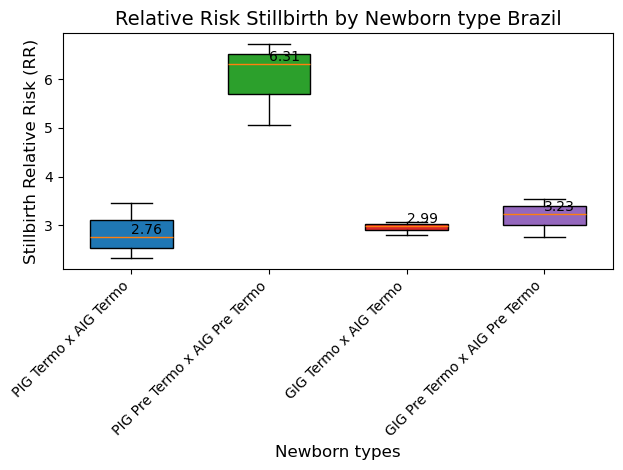

In [125]:
# Grafico Brasil total
df_result_brasil = pd.read_excel('./resultado/brasil_total_por_semana_rr_e_prevalencia.xlsx')
graficos(df=df_result_brasil, nome_graf='./graficos/box_plot_brasil_todos_os_anos_RR_nasc_expostos.png', label='Brasil')

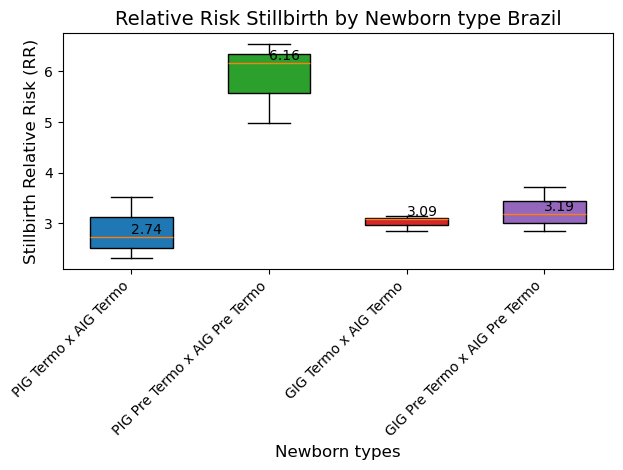

In [127]:
# Grafico Brasil sem zika e covid
df_result_brasil_sem_zika_covid = pd.read_excel('./resultado/brasil_sem_zika_covid_por_semana_rr_e_prevalencia.xlsx')
graficos(df=df_result_brasil_sem_zika_covid, nome_graf='./graficos/box_plot_brasil_sem_zika_covid_os_anos_RR_nasc_expostos.png', label='Brasil')

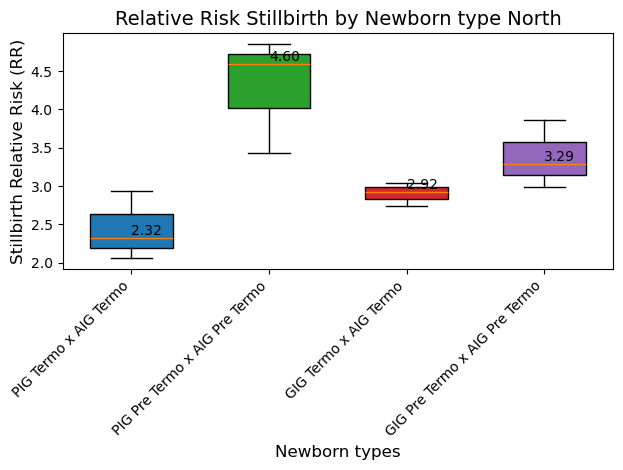

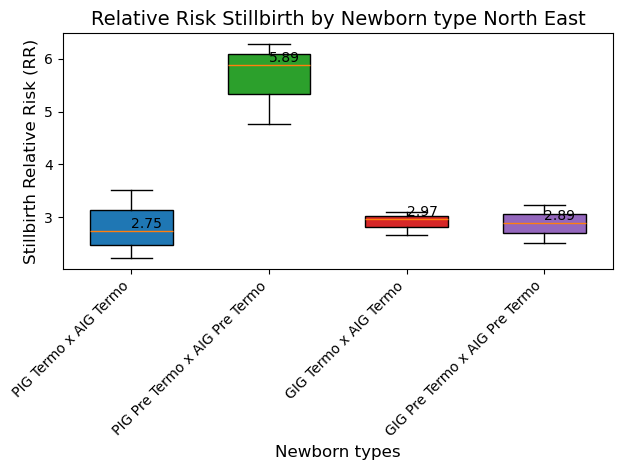

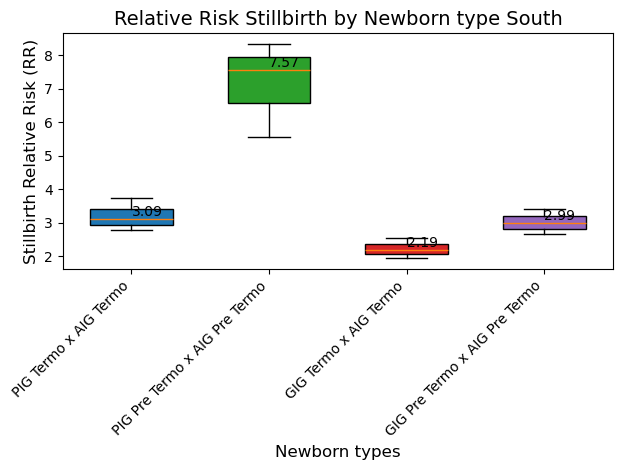

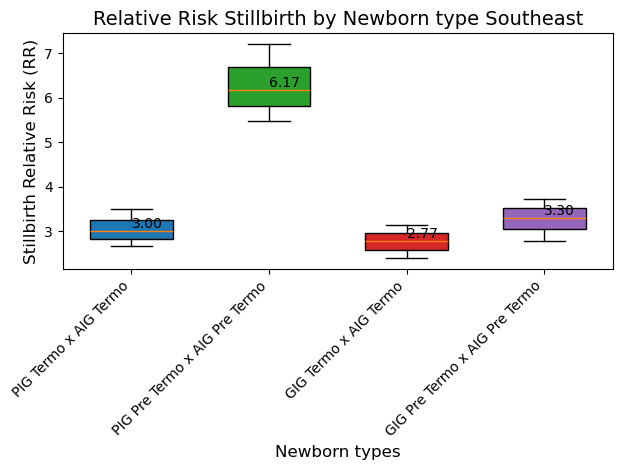

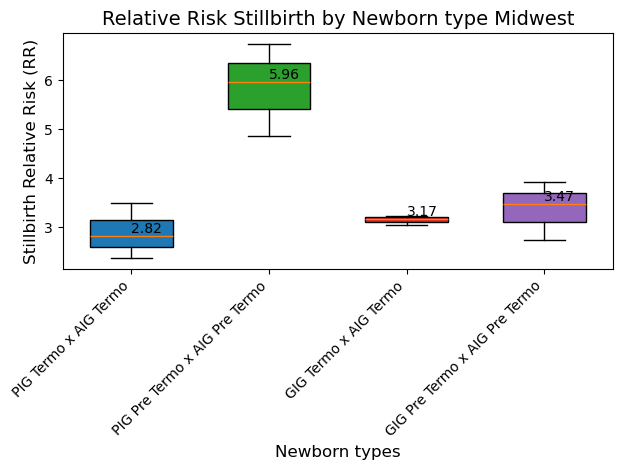

In [129]:
# Regiao Total
regiao = ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']
for reg in regiao:
    df = pd.read_excel(f'./resultado/regiao_total_por_semana_rr_e_prevalencia_{reg}.xlsx')
    graficos(df=df, nome_graf=f'./graficos/box_plot_{reg}_todos_os_anos_RR_nasc_expostos.png', label=reg)

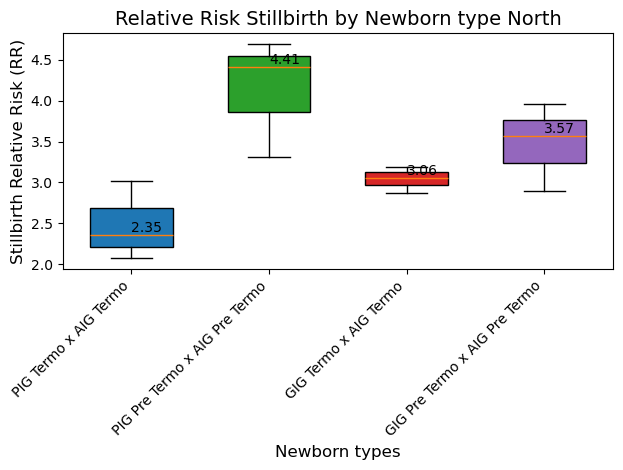

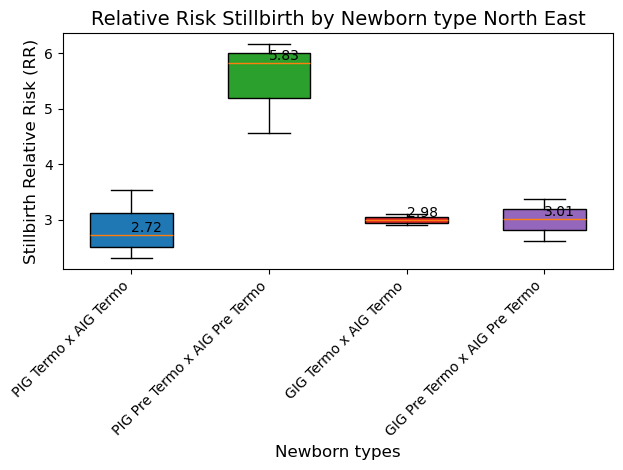

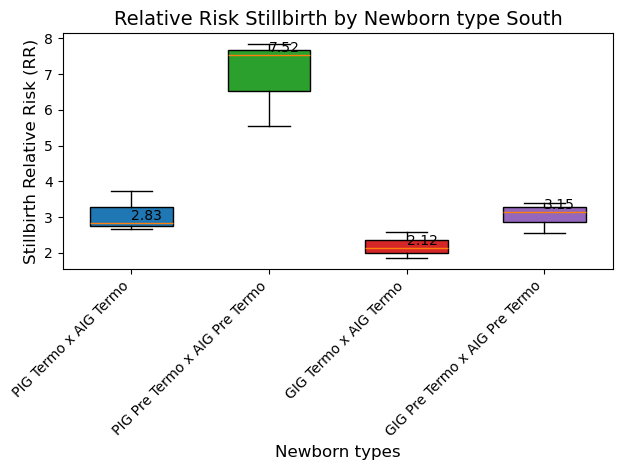

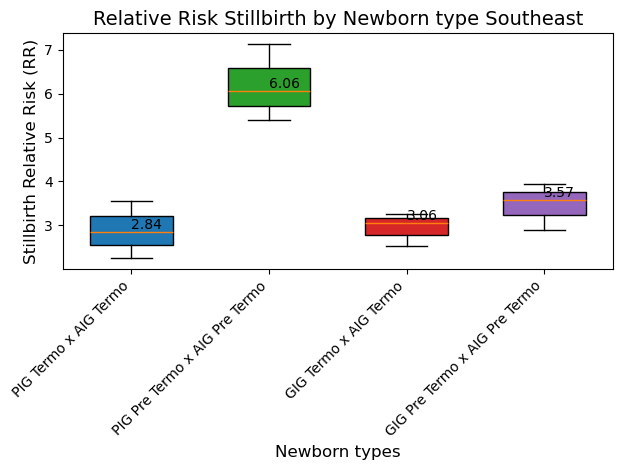

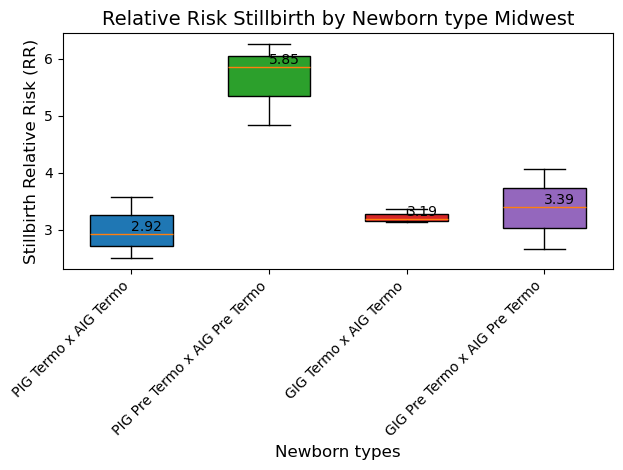

In [131]:
# Regiao Total
regiao = ['Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']
for reg in regiao:
    df = pd.read_excel(f'./resultado/regiao_sem_zika_covid_por_semana_rr_e_prevalencia_{reg}.xlsx')
    graficos(df=df, nome_graf=f'./graficos/box_plot_{reg}_sem_zika_covid_os_anos_RR_nasc_expostos.png', label=reg)